#                                        Rendu TP3 Optimisation 

## $- Koussaila KADI$


## Groupe: $B$

Fonction pour le calcul des gradient avec le calcul symbolique 

In [1]:
from sympy import symbols
from sympy import sqrt,Matrix
import sympy as sy
import math as m
import numpy as np 
import matplotlib.pyplot as plt


# la fonction dérivée 1 et 2 eme ordre
def derivee(f):
    
    x, y= symbols('x y') 
    f = sy.sympify(f)
    print("J(x)= {}".format(f)) 
  
    # 1 ere dérivée: 
    d1fx = sy.diff(f, x)
    d1fy = sy.diff(f, y)
    d1L=[d1fx,d1fy]
    print('J\'(x,y)=: {}'.format(d1L))
    d1f=Matrix((d1fx,d1fy))
    # 2ème dérivée
    d2fxx= sy.diff(f,x,x)
    d2fyy= sy.diff(f,y,y)
    d2L=[d2fxx,d2fyy]
    print('J\'\'(x,y)= {}'.format(d2L)) 
    
    # convertir en fonction
    d1fx=sy.lambdify(x,d1fx)
    d1fy=sy.lambdify(y,d1fy)
    d2fxx=sy.lambdify(x,d2fxx)
    d2fyy=sy.lambdify(y,d2fyy)
    print("*******fin de calcul de derivées 1 ordre et 2eme ordre ****")
    return d1fx,d1fy,d2fxx,d2fyy,d1L,d2L

# Exercice1 :

le critère : minimisation de la distance $|MM_0|$ 

le domaine : $y=x^2$

la fonction coût: $J(x,y)$=$(x-x_0)^2$ + $(y-y_0)^2$

avec $M(x_0,y_0)$

### méthode de substitution par rapport à X

In [2]:
def cost_functionX(): 
    L="(x)**2+(x**2-2)**2"
    return L
def J_xy(x,y):
    z=(x-0)**2+(y-2)**2
    return z
def J_x(x):
    z=(x-0)**2+(x**2-2)**2
    return z
def contrainte(x):
    y=x**2
    return y

J(x)= x**2 + (x**2 - 2)**2
J'(x,y)=: [4*x*(x**2 - 2) + 2*x, 0]
J''(x,y)= [6*(2*x**2 - 1), 0]
*******fin de calcul de derivées 1 ordre et 2eme ordre ****
[-1.22474  1.22474]


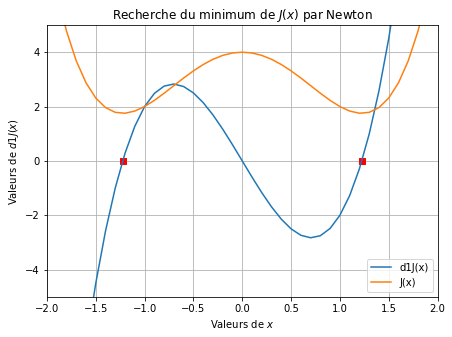

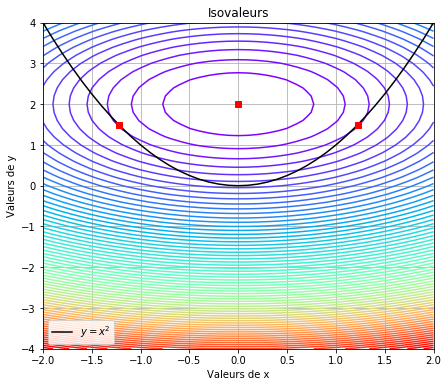

In [3]:
JL=cost_functionX()
J=J_x
#calcul de la derivée de J(x,y)  
d1fx,d1fy,d2fxx,d2fyy,d1L,d2L =derivee(JL)   # d1J= J'(x,y)   # d2J=J''(x,y)      # tmp : variable temporelle 
d1J=d1fx
contrainte=contrainte
# les solutions des zeros: 
x_zeros_min=[float(format(float(-np.sqrt(3/2)),'.5f')),float(format(np.sqrt(3/2),'.5f'))]
#dessiner(x_zeros_min)

#-----affichage: 
x_zeros_min=np.asarray(x_zeros_min)

xmin, xmax, nx = -2, 2, 41
x= np.linspace(xmin,xmax,nx)
    
z=[]
#représenter les points xn sur le graphe:
for xn in x_zeros_min:
     z.append(d1J(xn))
    
z=np.asarray(z)
    
# Visualisation des résultats
plt.figure(figsize=(7,5))
plt.plot(x_zeros_min,z,'rs')
plt.plot(x,d1J(x),label='d1J(x)')
plt.plot(x,J(x),label='J(x)')
plt.legend()
plt.xlabel('Valeurs de $x$')
plt.ylabel('Valeurs de $d1J(x)$')
plt.title('Recherche du minimum de $J(x)$ par Newton')
plt.grid()
plt.axis([xmin, xmax, -5, 5])

#---- affichage des isovaleurs valeurs 

       
ymin, ymax, ny = -4, 4, 41
# Discrétisation du domaine de tracé
x1d = np.linspace(xmin,xmax,nx)
y1d = np.linspace(ymin,ymax,ny)
x2d, y2d = np.meshgrid(x1d, y1d)
    
    
# Tracé des isovaleurs de f1
nIso = 71
plt.figure(figsize=(7,6))
plt.contour(x2d,y2d,J_xy(x2d,y2d),nIso,cmap='rainbow')
plt.plot(x1d,contrainte(x1d),c='black',label='$y=x^2$')
plt.plot(x_zeros_min,contrainte(x_zeros_min),'rs')
plt.plot(0,2,'rs')
plt.title('Isovaleurs')
plt.xlabel('Valeurs de x')
plt.ylabel('Valeurs de y')
plt.grid()
plt.legend()
#plt.axis('square')
print(x_zeros_min)

### méthode de substitution par rapport à Y

In [4]:
def cost_functionY(): 
    L="y+(y-2)**2"
    return L
def J_xy(x,y):
    z=(x-2)**2+(y)**2
    return z
def J_y(y):
    z=y+(y-2)**2
    return z
def contrainte(y):
    x=np.sqrt(y)
    return x

J(x)= y + (y - 2)**2
J'(x,y)=: [0, 2*y - 3]
J''(x,y)= [0, 2]
*******fin de calcul de derivées 1 ordre et 2eme ordre ****


C:\Users\Nath\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


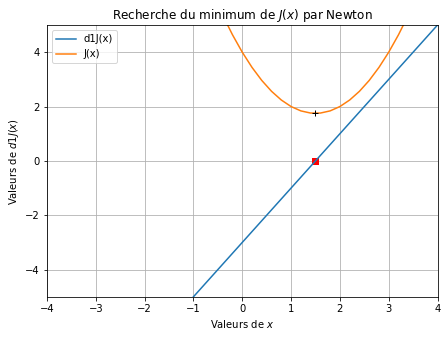

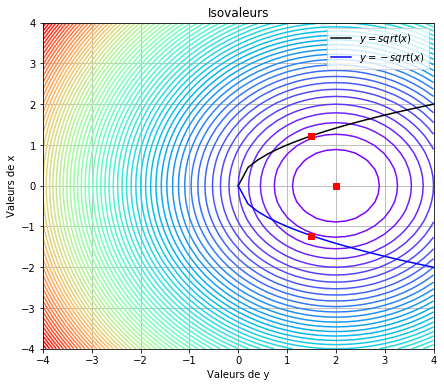

In [5]:
JL=cost_functionY()
J=J_y
#calcul de la derivée de J(x,y)  
d1fx,d1fy,d2fxx,d2fyy,d1L,d2L =derivee(JL)   # d1J= J'(x,y)   # d2J=J''(x,y)      # tmp : variable temporelle 
d1J=d1fy
contrainte=contrainte
# les solutions des zeros: 
y_zeros_min=[3/2,3/2]


# Visualisation des résultats
xmin, xmax, nx = -4, 4, 41
x= np.linspace(xmin,xmax,nx)

plt.figure(figsize=(7,5))
plt.plot(y_zeros_min,z,'rs')
plt.plot(x,d1J(x),label='d1J(x)')
plt.plot(x,J(x),label='J(x)')
plt.plot(3/2,J_y(3/2),'k+')
plt.legend()
plt.xlabel('Valeurs de $x$')
plt.ylabel('Valeurs de $d1J(x)$')
plt.title('Recherche du minimum de $J(x)$ par Newton')
plt.grid()
plt.axis([xmin, xmax, -5, 5])

#---- affichage des isovaleurs valeurs 

       
ymin, ymax, ny = -4, 4, 41
# Discrétisation du domaine de tracé
x1d = np.linspace(xmin,xmax,nx)
y1d = np.linspace(ymin,ymax,ny)
x2d, y2d = np.meshgrid(x1d, y1d)
    
    
# Tracé des isovaleurs de f1
nIso = 71
plt.figure(figsize=(7,6))
plt.contour(x2d,y2d,J_xy(x2d,y2d),nIso,cmap='rainbow')
plt.plot(x1d,contrainte(x1d),c='black',label='$y=sqrt(x)$')
plt.plot(x1d,(-contrainte(x1d)),c='b',label='$y=-sqrt(x)$')
plt.plot(y_zeros_min,contrainte(y_zeros_min),'rs')
tmp=x_zeros_min[0]
tmp1=y_zeros_min[0]
plt.plot(tmp1,tmp,'rs')
plt.plot(2,0,'rs')
plt.title('Isovaleurs')
plt.xlabel('Valeurs de y')
plt.ylabel('Valeurs de x')
plt.grid()
plt.legend()
#plt.axis('square')


### méthode les multiplicateurs de lagrange:

J(x)= x**2 + (x**2 - 2)**2
J'(x,y)=: [4*x*(x**2 - 2) + 2*x, 0]
J''(x,y)= [6*(2*x**2 - 1), 0]
*******fin de calcul de derivées 1 ordre et 2eme ordre ****
les coefficients de lagrange: [1, 4]


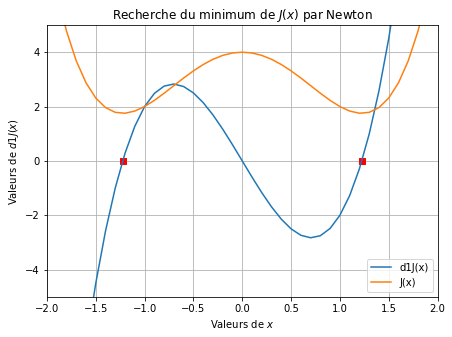

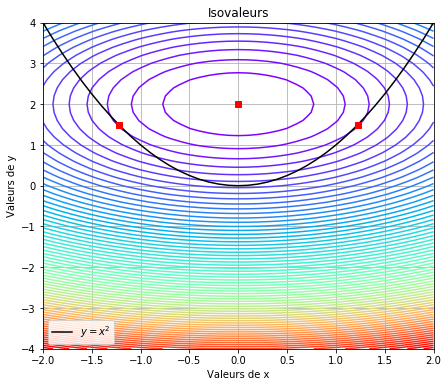

In [6]:
def Lagrange():
    d1fLagx=2*(x-0)-2*Lambda*x
    d1fLagy=2*(y-2)+Lambda
    d1fLangLambda=y-x**2
    return d1fLagx,d1fLagy,d1fLangLambda

def cost_functionX(): 
    L="(x)**2+(x**2-2)**2"
    return L
def J_xy(x,y):
    z=(x-0)**2+(y-2)**2
    return z
def J_x(x):
    z=(x-0)**2+(x**2-2)**2
    return z
def contrainte(x):
    y=x**2
    return y

x_zeros_min=[float(format(float(-np.sqrt(3/2)),'.5f')),float(format(np.sqrt(3/2),'.5f'))]
Lambda=[1,4]
y_zeros_min=[3/2,3/2]
JL=cost_functionX()
J=J_x
#calcul de la derivée de J(x,y)  
d1fx,d1fy,d2fxx,d2fyy,d1L,d2L =derivee(JL)   # d1J= J'(x,y)   # d2J=J''(x,y)      # tmp : variable temporelle 
d1J=d1fx
contrainte=contrainte
# les solutions des zeros: 
x_zeros_min=[float(format(float(-np.sqrt(3/2)),'.5f')),float(format(np.sqrt(3/2),'.5f'))]
#dessiner(x_zeros_min)

#-----affichage: 
x_zeros_min=np.asarray(x_zeros_min)

xmin, xmax, nx = -2, 2, 41
x= np.linspace(xmin,xmax,nx)
    
z=[]
#représenter les points xn sur le graphe:
for xn in x_zeros_min:
     z.append(d1J(xn))
    
z=np.asarray(z)
    
# Visualisation des résultats
plt.figure(figsize=(7,5))
plt.plot(x_zeros_min,z,'rs')
plt.plot(x,d1J(x),label='d1J(x)')
plt.plot(x,J(x),label='J(x)')
plt.legend()
plt.xlabel('Valeurs de $x$')
plt.ylabel('Valeurs de $d1J(x)$')
plt.title('Recherche du minimum de $J(x)$ par Newton')
plt.grid()
plt.axis([xmin, xmax, -5, 5])

#---- affichage des isovaleurs valeurs 

       
ymin, ymax, ny = -4, 4, 41
# Discrétisation du domaine de tracé
x1d = np.linspace(xmin,xmax,nx)
y1d = np.linspace(ymin,ymax,ny)
x2d, y2d = np.meshgrid(x1d, y1d)
    
    
# Tracé des isovaleurs de f1
nIso = 71
plt.figure(figsize=(7,6))
plt.contour(x2d,y2d,J_xy(x2d,y2d),nIso,cmap='rainbow')
plt.plot(x1d,contrainte(x1d),c='black',label='$y=x^2$')
plt.plot(x_zeros_min,contrainte(x_zeros_min),'rs')
plt.plot(0,2,'rs')
plt.title('Isovaleurs')
plt.xlabel('Valeurs de x')
plt.ylabel('Valeurs de y')
plt.grid()
plt.legend()
#plt.axis('square')
print('les coefficients de lagrange:',Lambda)

# Exercice 2

le critère : minimisation de la distance $|MM_0|$ 

le domaine : $y=x^2+y^2+z^2-1$

la fonction coût: $J(x,y)$=$(x-x_0)^2$ + $(y-y_0)^2$ + $(z-z_0)^2$ 
avec $M(x_0,y_0,z_0)$

Changement de base :

phi=[$-pi/2$,$pi/2$]

theta=[$0$,$2pi$]

R=$1$

ce qui implique : $J(R,theta,phi)$=$(cosphi).cos(theta)-x_0)^2$ + $(cos(phi).sin(theta)-y_0)^2$ + $(sin(phi)-z_0)^2$ 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product, combinations

# on replace directement le point recherché: (1,2,3)
def J3D(x,y,z):
    return (x-1)**2 + (y-2)**2 + (z-3)**2

def Jcontrainte3D(x,y):
    f=x**2+y**2+z**2-1
    return f
def Jsphere(phi,theta):
    x = np.cos(theta)*np.sin(phi)
    y = np.sin(theta)*np.sin(phi)
    z = np.cos(phi)
    return x,y,z

#solutions de lagrange calculées à la main:
x_zeros = np.sqrt(1/14)
y_zeros = 2*np.sqrt(1/14)
z_zeros = 3*np.sqrt(1/14)

(50, 50)


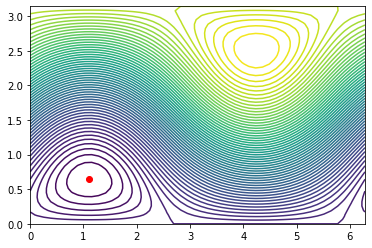

In [8]:
# dessiner la sphere
#theta = np.arange(0, 2*np.pi); phi = np.arange(0, np.pi)
theta = np.linspace(0, 2*np.pi)
phi = np.linspace(0, np.pi)
rho = 1

theta2d, phi2d = np.meshgrid(theta, phi)

x = np.cos(theta2d)*np.sin(phi2d)
y = np.sin(theta2d)*np.sin(phi2d)
z = np.cos(phi2d)

print(J3D(x,y,z).shape)

# Grille des isovaleurs
theta2d, phi2d = np.meshgrid(theta, phi)

#Trace des isovaleurs
plt.contour(theta2d, phi2d, J3D(x,y,z), 64)

#affichage de la solution analytique en coordonnées sphérique :
plt.plot(np.arctan(y_zeros/x_zeros), np.arccos(z_zeros/rho), 'ro')


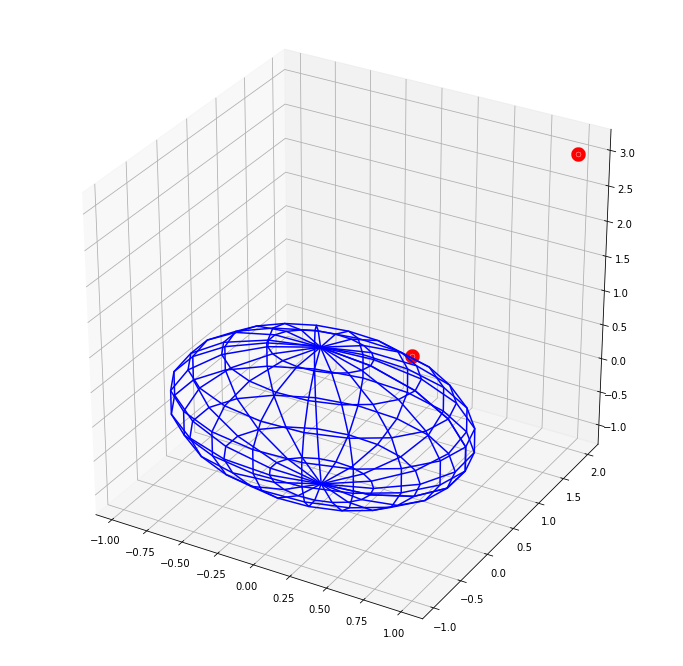

In [9]:
#convertir en coordonnées sphérique :
phi_zeros=np.arcsin(z_zeros)

y_x=y_zeros/x_zeros

theta_zeros=np.arctan(y_x)

# 3D:
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

# dessiner la sphere
theta, phi = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x,y,z=Jsphere(phi,theta)
ax.plot_wireframe(x, y, z, color="b")

x,y,z=Jsphere(phi_zeros,theta_zeros)
ax.scatter(1,2,3,color='r',linewidths=10)

x,y,z=Jsphere(phi_zeros,theta_zeros)
ax.scatter(x,y,z,color='r',linewidths=10)

# Exercice 3

le critère : minimisation de la distance $|MM_0|$ 


c1(x,y) : $y=(x-1)^2+y^2<=1$

c2(x,y) : $y=x^2+(y-1)^2<=1$

la fonction coût: $J(x,y)$=$y-x$ 

avec $M(x_0,y_0)$
 

<ipython-input-223-06249b4fbc7c>:25: UserWarning: The following kwargs were not used by contour: 'nIso'
  axes.contour(x2d,y2d,Jxy(x2d,y2d),nIso=71,cmap='rainbow')


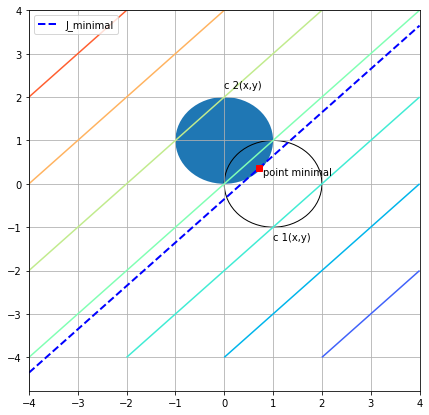

In [223]:
def Jxy(x,y):
    return y-x
def c1(x,y):
    return (x-1)**2+y**2-1
def c2(x,y):
    return x**2+ (y-1)**2-1

minimum=[1/np.sqrt(2),1/np.sqrt(2)]

xmin, xmax, nx = -4, 4, 100
ymin, ymax, ny = -4, 4, 100
# Discrétisation du domaine de tracé
x1d = np.linspace(xmin,xmax,nx)
y1d = np.linspace(ymin,ymax,ny)
x2d, y2d = np.meshgrid(x1d, y1d)


figure, axes = plt.subplots(figsize=(7,7))
draw_circle1= plt.Circle((0, 1), 1,fill='b')
draw_circle2 = plt.Circle((1, 0), 1,fill=False)

axes.add_artist(draw_circle1)
axes.add_artist(draw_circle2)

axes.contour(x2d,y2d,Jxy(x2d,y2d),nIso=71,cmap='rainbow')
axes.plot(x1d,x1d-(1/(2*np.sqrt(2))), 'b--', lw=2, label='J_minimal') # Blue dashed straight line
axes.plot(1/np.sqrt(2),(1/(2*np.sqrt(2))),'rs')
axes.text(0.8,0.2,'point minimal')
axes.text(0,2.2,'c 2(x,y)')
axes.text(1,-1.3,'c 1(x,y)')

plt.legend()
plt.grid()
plt.show()

# Exercice 4

le critère : minimisation de la distance $|MM_0|$ 


c1(x,y) : $y=x^2-y<=0$

c2(x,y) : $y=x+y<=2$

la fonction coût: $J(x,y)$=$x^2+y^2-4x-4y$ 

avec $M(x_0,y_0)$
 

<ipython-input-329-1f54b8ff1509>:15: UserWarning: The following kwargs were not used by contour: 'nIso'
  plt.contour(x2d,y2d,Jxy(x2d,y2d),nIso=71,cmap='rainbow')


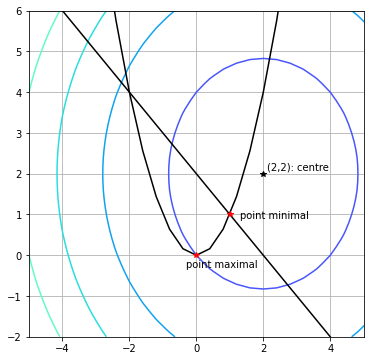

In [329]:
def Jxy(x,y):
    return x**2+y**2-4*(x+y)

def c1(x): # substitution par rapport à x
    return x**2

def c2(x) :# substitution par rapport à x
    return 2-x

x=np.linspace(-8,8,41)
y=np.linspace(-2,6,41)
x2d,y2d=np.meshgrid(x,y)

plt.figure(figsize=(6,6))
plt.contour(x2d,y2d,Jxy(x2d,y2d),nIso=71,cmap='rainbow')
plt.plot(x,c1(x),'k',x,c2(x),'k',2,2,'k*',1,1,'r*',0,0,'r*')
plt.text(-0.3,-0.3,'point maximal')
plt.text(1.3,0.9,'point minimal')
plt.text(2.1,2.1,'(2,2): centre')
plt.xlim([-5,5])
plt.ylim([-2,6])
plt.grid()

# exercice 5

le critère : minimisation avec pénalités


c(x,y) : $y=x^2+y^2-2<=0$


la fonction objectif: $f(x,y)$=$x-y$ 

$Fk= x-y$  $si$   $c(x,y)<=0$

$F_k$= $x-y$+$K.(x^2+y^2-2)^2$  si $c(x,y)>0$
 

In [305]:
from scipy.optimize import minimize
import numpy as np

<ipython-input-415-59b8012a6b52>:28: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(x2D[0],x2D[1],(x2D[0]-x2D[1]),label='y=x')


[-5.  5.]
[-1.41421462  1.4142125 ]
[-1.41421395  1.41421318]
[-1.41421523  1.41421189]


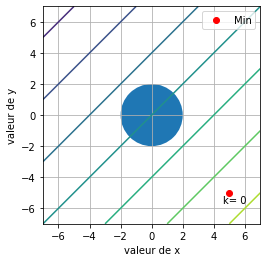

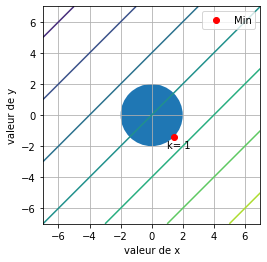

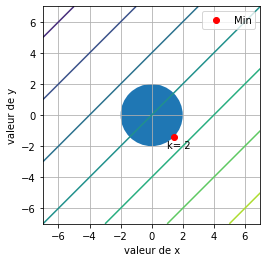

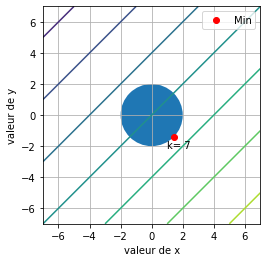

In [415]:
# les bandes d'analyse:
bounds=[(-5,5),(-5,5)]

# le point de départ x0
x0=[2,2]

# contrainte:
contrainte1={'type':'ineq','fun': lambda x: x[0]**2+x[1]**2-4}
# resultat:


#------------------------------------
x1D=[np.linspace(-7,7,61),np.linspace(-7,7,61)]
x2D=np.meshgrid(x1D[0],x1D[1])

k=np.array([0,1,2,7])
for i in range(1,5):
    #---contrainte:
    figure ,ax=plt.subplots()
    draw_circle1= plt.Circle((0, 0), 2,fill='green')
    ax.add_artist(draw_circle1)
    #--------------
    Fk = lambda x: (x[0] - x[1]) + k[i-1]*(x[0]**2 +x[1]**2 -2)**2 # avec x[0]: x , x[1]:y
    result=minimize(Fk,x0,method='SLSQP',bounds=bounds,constraints=contrainte1)
    
    #ax.contour(x2D[0],x2D[1],contrainte1['fun'](x2D))
    
    ax.contour(x2D[0],x2D[1],(x2D[0]-x2D[1]),label='y=x')
    ax.plot(result.x[1],result.x[0],'ro',label='Min')
    ax.text(result.x[1]-0.4,result.x[0]-0.7,'k= {}'.format(k[i-1]))
    plt.xlabel('valeur de x')
    plt.ylabel('valeur de y')
    plt.grid()
    plt.legend()
    print(result.x)
    ax.set_aspect(1)
    